In [3]:
!pip install fasttext

    100% |████████████████████████████████| 61kB 1.1MB/s 
  Stored in directory: /home/matej/.cache/pip/wheels/9f/f0/04/caa82c912aee89ce76358ff954f3f0729b7577c8ff23a292e3
Successfully built fasttext


In [ ]:
import fasttext

model = fasttext.train_supervised('dataset_train.txt', lr = 0.04, dim = 100, ws = 5, epoch = 200, minCount = 4)  

In [ ]:
lr                # learning rate [0.1]
dim               # size of word vectors [100]
ws                # size of the context window [5]
epoch             # number of epochs [5]
minCount          # minimal number of word occurences [1]
minCountLabel     # minimal number of label occurences [1]
minn              # min length of char ngram [0]
maxn              # max length of char ngram [0]
neg               # number of negatives sampled [5]
wordNgrams        # max length of word ngram [1]
loss              # loss function {ns, hs, softmax, ova} [softmax]
bucket            # number of buckets [2000000]
thread            # number of threads [number of cpus]
lrUpdateRate      # change the rate of updates for the learning rate [100]
t                 # sampling threshold [0.0001]
label             # label prefix ['__label__']
verbose           # verbose [2]
pretrainedVectors # pretrained word vectors (.vec file) for supervised learning []

In [67]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.3f}".format(1, p))
    print("R@{}\t{:.3f}".format(1, r))

print_results(*model.test('dataset_test.txt', 3))

N	8121
P@1	0.308
R@1	0.925


In [68]:
# with the previously trained `model` object, call :
model.quantize(input='data_train.txt', retrain=True)

# then display results and save the new model :
print_results(*model.test('dataset_test.txt', 2))
model.save_model("model.ftz")

N	8121
P@1	0.304
R@1	0.911


In [70]:
print_results(*model.test('dataset_test.txt', 1))

N	8121
P@1	0.324
R@1	0.324


In [72]:
model.predict("Fearless optimist Anna teams up with rugged mountain man Kristoff and his loyal reindeer Sven and sets off on an epic journey to find her sister Elsa, whose icy powers have trapped the kingdom of Arendelle in eternal winter. Encountering Everest-like conditions, mystical trolls and a hilarious snowman named Olaf, Anna and Kristoff battle the elements in a race to save the kingdom. From the outside Elsa looks poised, regal and reserved, but in reality she lives in fear as she wrestles with a mighty secret: she was born with the power to create ice and snow. It's a beautiful ability, but also extremely dangerous. Haunted by the moment her magic nearly killed her younger sister Anna, Elsa has isolated herself, spending every waking minute trying to suppress her growing powers. Her mounting emotions trigger the magic, accidentally setting off an eternal winter that she can't stop. She fears she's becoming a monster and that no one, not even her sister, can help her.", 10)

(('__label__Comedy',
  '__label__Animation',
  '__label__Adventure',
  '__label__Fantasy',
  '__label__Action',
  '__label__Family',
  '__label__Drama',
  '__label__Horror',
  '__label__Sci-Fi',
  '__label__Crime'),
 array([3.30698371e-01, 3.26577634e-01, 3.12982887e-01, 1.45471245e-02,
        6.11825706e-03, 4.72622458e-03, 2.49199825e-03, 1.00717670e-03,
        2.68597709e-04, 2.44498980e-04]))

In [73]:
model.predict("Danny Ocean wants to score the biggest heist in history. He combines an eleven member team, including Frank Catton, Rusty Ryan and Linus Caldwell. Their target? The Bellagio, the Mirage and the MGM Grand. All casinos owned by Terry Benedict. It's not going to be easy, as they plan to get in secretly and out with $150 million.", 10)

(('__label__Crime',
  '__label__Thriller',
  '__label__Action',
  '__label__Drama',
  '__label__Biography',
  '__label__Mystery',
  '__label__Comedy',
  '__label__History',
  '__label__Film-Noir',
  '__label__Western'),
 array([5.05442977e-01, 4.81608987e-01, 9.10713524e-03, 2.12841318e-03,
        7.83791358e-04, 3.00825806e-04, 2.09128470e-04, 1.62532087e-04,
        1.02381862e-04, 8.64521207e-05]))

In [74]:
model.predict('After his death sometime in his forty-third year, suburbanite Lester Burnham tells of the last few weeks of his life, during which he had no idea of his imminent passing. He is a husband to real estate agent Carolyn Burnham and father to high school student Janie Burnham. Although Lester and Carolyn once loved each other, they now merely tolerate each other. Typical wallflower Janie too hates both her parents, the three who suffer individually in silence in their home life. Janie tries to steer clear of both her parents. Carolyn, relatively new to the real estate business, wants to create the persona of success to further her career, she aspiring to the professional life of Buddy Kane, the king of the real estate business in their neighborhood. Lester merely walks mindlessly through life, including at his job in advertising. His company is downsizing, and he, like all the other employees, has to justify his position to the newly hired efficiency expert to keep his job. Things change',10)

(('__label__Drama',
  '__label__Comedy',
  '__label__Romance',
  '__label__Crime',
  '__label__Biography',
  '__label__Fantasy',
  '__label__Thriller',
  '__label__Action',
  '__label__Sport',
  '__label__Mystery'),
 array([8.10806930e-01, 8.71055424e-02, 7.01152161e-02, 1.26561411e-02,
        5.83010074e-03, 4.07595886e-03, 2.60220910e-03, 2.39564688e-03,
        2.37618783e-03, 3.88456188e-04]))

In [23]:
f = open('progress.txt', 'r')

data = []

if f.mode == 'r':
    contents = f.read()
    data = contents.split('ETA:   ')
                
print(data[0:10])

print(data[0][data[0].find('lr:  ') + len('lr:  '): data[0].find(' loss:')])

learning_rate = []
loss = []

for line in data[:-1]:
    learning_rate.append(float(line[line.find('lr:  ') + len('lr:  '): line.find(' loss:')]))
    loss.append(float(line[line.find('loss:  ') + len('loss:  '): -1]))
    
print(learning_rate[0:10])
print(loss[0:10])

['Progress:   0.0% words/sec/thread: 1232323 lr:  0.039990 loss:  3.060291 ', 'Progress:   0.1% words/sec/thread: 1245744 lr:  0.039979 loss:  3.060180 ', 'Progress:   0.1% words/sec/thread: 1233611 lr:  0.039969 loss:  3.060168 ', 'Progress:   0.1% words/sec/thread: 1232877 lr:  0.039958 loss:  3.054887 ', 'Progress:   0.1% words/sec/thread: 1241285 lr:  0.039947 loss:  3.028983 ', 'Progress:   0.2% words/sec/thread: 1252013 lr:  0.039936 loss:  2.979458 ', 'Progress:   0.2% words/sec/thread: 1256624 lr:  0.039925 loss:  2.930930 ', 'Progress:   0.2% words/sec/thread: 1241422 lr:  0.039915 loss:  2.897735 ', 'Progress:   0.2% words/sec/thread: 1244523 lr:  0.039904 loss:  2.871225 ', 'Progress:   0.3% words/sec/thread: 1235756 lr:  0.039894 loss:  2.849284 ']
0.039990
[0.03999, 0.039979, 0.039969, 0.039958, 0.039947, 0.039936, 0.039925, 0.039915, 0.039904, 0.039894]
[3.060291, 3.06018, 3.060168, 3.054887, 3.028983, 2.979458, 2.93093, 2.897735, 2.871225, 2.849284]


AttributeError: 'function' object has no attribute 'get_xaxis'

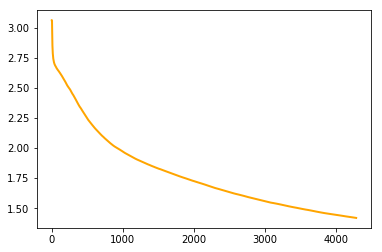

In [32]:
import matplotlib.pyplot as plt

x = range(len(loss))

fig, ax = plt.subplots(1)

ax.plot(x, loss, marker='', color='orange', linewidth=2, label='loss')
ax.set_xticklabels([])

plt.legend()

plt.savefig('progress.png')
plt.show()